In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Raport Lab 6 (25.11.2024)
Wykonany przez: Filip Połom

### Zad 1

In [ ]:
obraz = Image.open('pliki/obraz.png')
inicjaly = Image.open('pliki/inicjaly.bmp')

### Zad 2a

In [ ]:
def zakres(w, h):
    return [(i, j) for i in range(w) for j in range(h)]


def wstaw_inicjaly(obraz, inicjaly, m, n, kolor):
    obraz_wyjsciowy = obraz.copy()
    (w, h) = inicjaly.size
    (w0, h0) = obraz_wyjsciowy.size
    for (i, j) in zakres(w, h):
        if i + m < w0 and j + n < h0:
            if not inicjaly.getpixel((i, j)):
                obraz_wyjsciowy.putpixel((i + m, j + n), kolor)
    return obraz_wyjsciowy

obraz1 = wstaw_inicjaly(obraz, inicjaly, obraz.size[0] - inicjaly.size[0], obraz.size[1] - inicjaly.size[1], (255, 0, 0))
obraz1.save('obraz1.png')

### Zad 2b

In [ ]:
def negatyw_pixel(pixel):
    return tuple(255 - subpixel for subpixel in pixel)


def wstaw_inicjaly_maska(obraz, inicjaly, m, n):
    obraz_wyjsciowy = obraz.copy()
    (w, h) = inicjaly.size
    (w0, h0) = obraz_wyjsciowy.size
    for (i, j) in zakres(w, h):
        if i + m < w0 and j + n < h0:
            if not inicjaly.getpixel((i, j)):
                negatyw_pixela = negatyw_pixel(obraz_wyjsciowy.getpixel((i + m, j + n)))
                obraz_wyjsciowy.putpixel((i + m, j + n), negatyw_pixela)
    return obraz_wyjsciowy

obraz2 = wstaw_inicjaly_maska(obraz, inicjaly, obraz.size[0] // 2, obraz.size[1] // 2)
obraz2.save('obraz2.png')

### Zad 3

In [ ]:
def wstaw_inicjaly_load(obraz, inicjaly, m, n, kolor):
    obraz_wyjsciowy = obraz.copy()
    (w, h) = inicjaly.size
    (w0, h0) = obraz_wyjsciowy.size
    pix_obraz = obraz_wyjsciowy.load()
    pix_inicjaly = inicjaly.load()
    for (i, j) in zakres(w, h):
        if i + m < w0 and j + n < h0:
            if not pix_inicjaly[i, j]:
                pix_obraz[i + m, j + n] = kolor
    return obraz_wyjsciowy


def wstaw_inicjaly_maska_load(obraz, inicjaly, m, n):
    obraz_wyjsciowy = obraz.copy()
    (w, h) = inicjaly.size
    (w0, h0) = obraz_wyjsciowy.size
    pix_obraz = obraz_wyjsciowy.load()
    pix_inicjaly = inicjaly.load()
    for (i, j) in zakres(w, h):
        if i + m < w0 and j + n < h0:
            if not pix_inicjaly[i, j]:
                negatyw_pixela = negatyw_pixel(pix_obraz[i + m, j + n])
                pix_obraz[i + m, j + n] = negatyw_pixela
    return obraz_wyjsciowy


obraz1a = wstaw_inicjaly_load(obraz, inicjaly, obraz.size[0] - inicjaly.size[0], obraz.size[1] - inicjaly.size[1], (255, 0, 0))
obraz2a = wstaw_inicjaly_maska_load(obraz, inicjaly, obraz.size[0] // 2, obraz.size[1] // 2)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(obraz1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(obraz2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(obraz1a)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(obraz2a)
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('fig1.png')
plt.show()

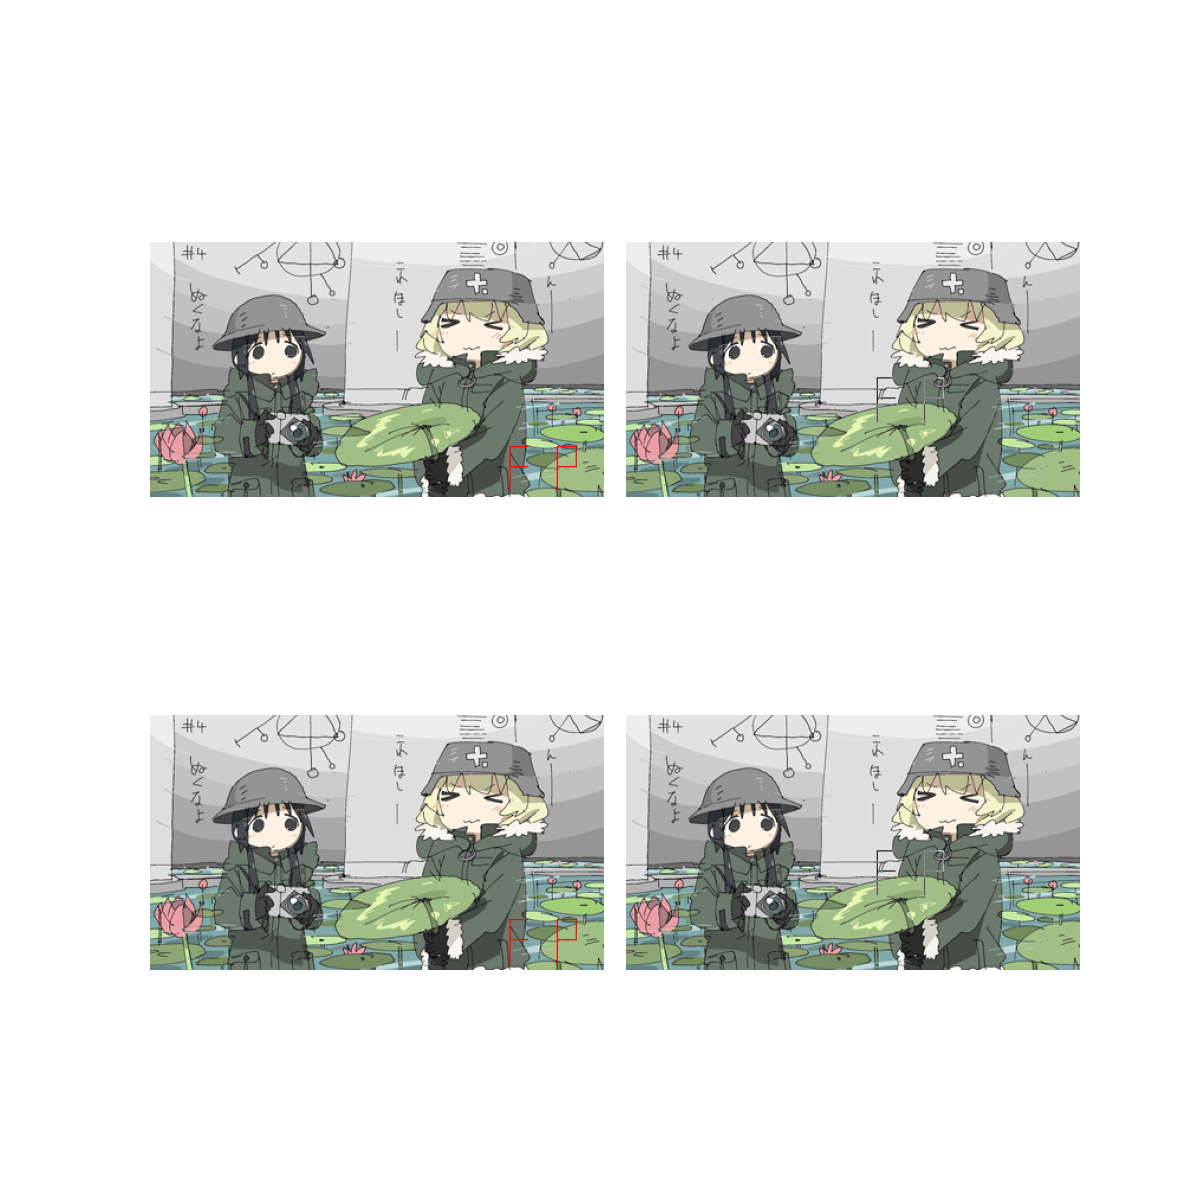

Uzyskane obrazy są takie same

### Zad 4a

In [ ]:
def kontrast(obraz, wsp_kontrastu):
    mn = ((255+wsp_kontrastu)/255)**2
    obraz_wyjsciowy = obraz.point(lambda i: 128 + (i - 128) * mn)
    return obraz_wyjsciowy


obraz4a1 = kontrast(obraz, 25)
obraz4a2 = kontrast(obraz, 50)
obraz4a3 = kontrast(obraz, 100)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(obraz)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(obraz4a1)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(obraz4a2)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(obraz4a3)
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('fig2.png')
plt.show()

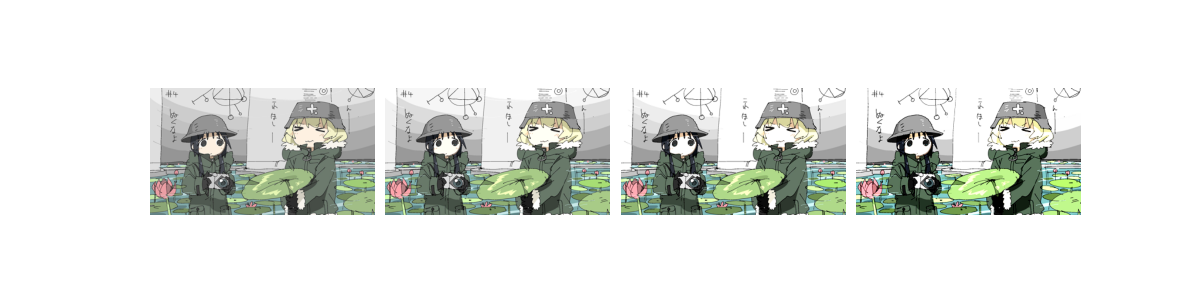

Zwiększony kontrast sprawia, że ciemne partie obrazu stają się jeszcze ciemniejsze, a jasne partie są jeszcze jaśniejsze.

Siła efektu zależy od współczynnika kontrastu jaki zostanie podany na wejściu funkcji.

### Zad 4b

In [ ]:
def transformacja_logarytmiczna(obraz):
    obraz_wyjsciowy = obraz.point(lambda i: 255 * np.log(1 + i / 255))
    return obraz_wyjsciowy


def filtr_liniowy(image, a, b):
    image2 = image.copy()
    w, h = image2.size
    pixele = image2.load()
    for i, j in zakres(w, h):
        pixele[i, j] = (pixele[i, j][0]* a + b, pixele[i, j][1]* a + b, pixele[i, j][2]* a + b)
    return image2


obraz4b1 = transformacja_logarytmiczna(obraz)
obraz4b2 = filtr_liniowy(obraz,2,100)

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(obraz)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(obraz4b1)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(obraz4b2)
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('fig3.png')
plt.show()


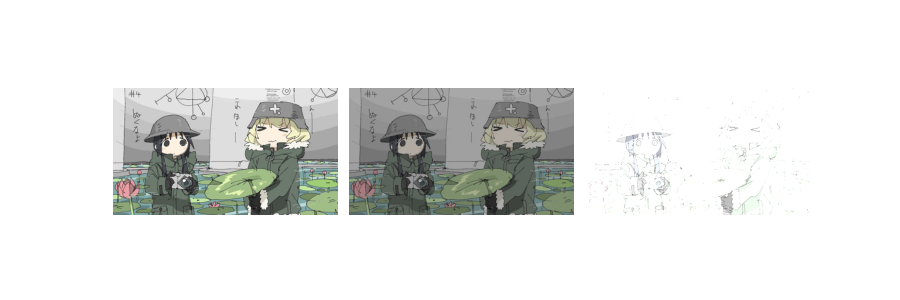

Transformacja logarytmiczna przyciemna obraz przyrównując każdy pixel do logarytmu. Im pixel jaśniejszy tym zostanie bardziej przyciemniony.

Np. pixel (255,255,255) zostanie przyciemniony do (176, 176, 176), a pixel (128, 128, 128) do (103, 103, 103).

Filtr liniowy pozwala przy użyciu parametrów a i b podjaśnić lub przyciemnić liniowo obraz.

Dla parametrów a=2 i b=100 obraz będzie w prawie każdym miejscu bardzo jasny, dlatego na wykresie słabo go widać.

### Zad 4c

In [ ]:
def transformacja_gamma(obraz, gamma):
    obraz_wyjsciowy = obraz.point(lambda i: (i / 255) ** (1 / gamma) * 255)
    return obraz_wyjsciowy


obraz4c1 = transformacja_gamma(obraz, 0.01)
obraz4c2 = transformacja_gamma(obraz, 0.5)
obraz4c3 = transformacja_gamma(obraz, 4)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(obraz)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(obraz4c1)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(obraz4c2)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(obraz4c3)
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('fig4.png')
plt.show()

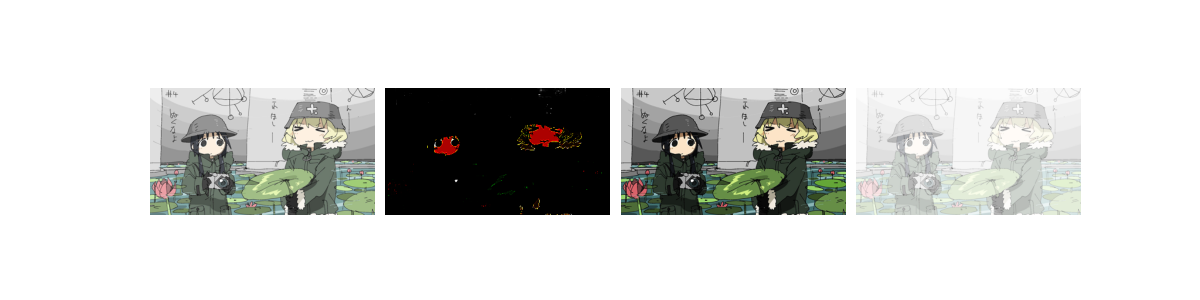

Funkcja transformacja gamma dla gammy > 1 rozjaśnia pixele tym bardziej im ciemniejsze są.

Dla gammy < 1 robi dokładnie na odwrót, przyciemnia pixele tym bardziej są jaśniejsze.


### Zad 5
Obraz z tablicy jest inny, gdyż dochodzi do tzw. integer overflow, gdzie zbyt duża wartość, która może być przechowywana jest zawijana na początek zakresu.

In [ ]:
T = np.array(obraz, dtype='uint16')  # ustawiamy większy zakres inta
T += 100
T = np.clip(T, 0, 255).astype('uint8') # ustawiam zakres od 0 do 255 i przywracam do uint8
obraz_wynik = Image.fromarray(T, "RGB")
obraz_wynik.show()